In [83]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')

from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [3]:
b = baby('FMC003')

In [4]:
# Not specified types are strings
#T = pd.read_csv('../TOST_data/average_properties.txt',
#            sep='\t',index_col=0,na_values=-99,
#            dtype={'WEIGHT_GRAMS': float,
#                   'GEST_AGE_DAYS':float,
#                   'DELTA_SEC_MEASURE':float,
#                   'MED_SPO2':float,
#                   'MED_PI':float,
#                   'MED_PR':float,
#                   'BRADY_SEC_PR':float,
#                   'BRADY_RATIO_PR':float,
#                   'BRADY_RATIO_PR_m10':float,
#                   'BRADY_RATIO_PR_m20':float,
#                   'BRADY_RATIO_PR_m30':float,
#                   'BRADY_RATIO_PR_m40':float,
#                   'BRADY_SEC_SPO2':float,
#                   'BRADY_RATIO_SPO2':float,
#                   'BRADY_SEC_PR_DYN':float,
#                   'BRADY_RATIO_PR_DYN':float})
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)

In [5]:
T.columns.values

array(['BABY_IDS', 'GENDER', 'WEIGHT_GRAMS', 'GEST_AGE_DAYS', 'DELIVERY',
       'BIRTH_DATE', 'FILE', 'DELTA_SEC_MEASURE', 'MED_SPO2', 'MED_PR',
       'MED_PI', 'MEAN_SPO2', 'MEAN_PR', 'MEAN_PI', 'STD_SPO2', 'STD_PR',
       'STD_PI', 'PHN', 'WRIST', 'FOOT', 'BRADY_SEC_PR', 'BRADY_RATIO_PR',
       'BRADY_RATIO_PR_m10', 'BRADY_RATIO_PR_m20', 'BRADY_RATIO_PR_m30',
       'BRADY_RATIO_PR_m40', 'BRADY_SEC_SPO2', 'BRADY_RATIO_SPO2',
       'BRADY_SEC_PR_DYN', 'BRADY_RATIO_PR_DYN', 'BRADY_NUM_PER_HOUR_PR',
       'BRADY_NUM_PER_HOUR_PR_m10', 'BRADY_NUM_PER_HOUR_PR_m20',
       'BRADY_NUM_PER_HOUR_PR_m30', 'BRADY_NUM_PER_HOUR_PR_m40',
       'BRADY_NUM_PER_HOUR_PR_dyn', 'BRADY_NUM_PER_HOUR_PR_anytime',
       'BRADY_NUM_PER_HOUR_PR_m10_anytime',
       'BRADY_NUM_PER_HOUR_PR_m20_anytime',
       'BRADY_NUM_PER_HOUR_PR_m30_anytime',
       'BRADY_NUM_PER_HOUR_PR_m40_anytime',
       'BRADY_NUM_PER_HOUR_PR_dyn_anytime', 'BRADY_DURATION_MEDIAN_PR',
       'BRADY_DURATION_MEDIAN_PR_m10', 'BRAD

In [6]:
single=(T['WRIST']==True)&(T['PHN']==False)

In [7]:
v1 = (np.unique(T[single]['BABY_IDS']))

In [8]:
v2 = (np.unique(T['BABY_IDS']))

In [9]:
print(len(v1))
print(len(v2))

# if the two following numbers are different,
# it means that selecting wrist and no phn is
# not enough to have the number of entries equal
# to the number of babies

252
268


In [10]:
#for name in v1:
#    print(name)

In [11]:
#This baby has two measurements in the hospital
T[(T['BABY_IDS']=='PLC006')& single ]

,BABY_IDS,GENDER,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,MED_PR,...,BRADY_NUM_PER_HOUR_PR_m20_anytime,BRADY_NUM_PER_HOUR_PR_m30_anytime,BRADY_NUM_PER_HOUR_PR_m40_anytime,BRADY_NUM_PER_HOUR_PR_dyn_anytime,BRADY_DURATION_MEDIAN_PR,BRADY_DURATION_MEDIAN_PR_m10,BRADY_DURATION_MEDIAN_PR_m20,BRADY_DURATION_MEDIAN_PR_m30,BRADY_DURATION_MEDIAN_PR_m40,BRADY_DURATION_MEDIAN_PR_dyn
111,PLC006,Male,4205.0,285.0,Csection,2014-03-19 16:13:00,/home/giorgio/Desktop/NHS/TOST_data/TOST PLC D...,69044.0,97.0,111.0,...,15.154994,0.688863,0.688863,0.000000,48.0,44.0,35.0,20.0,NaN,NaN
113,PLC006,Male,4205.0,285.0,Csection,2014-03-19 16:13:00,/home/giorgio/Desktop/NHS/TOST_data/TOST PLC D...,156043.0,96.0,119.0,...,7.164971,3.980540,4.776648,4.776648,34.0,39.0,28.0,40.0,34.0,34.0


In [12]:
total = len(np.unique(T['BABY_IDS']))
print('TOT NUMBER OF BABIES: ',total)

def unique_id(table,tot=total):
    '''input: table with the selection on the category you want to count
       output: the number of baby from that table and the fraction 
       of the total number of babies'''
    # take the same baby id just once (as we want to count babies)
    n = len(np.unique(table['BABY_IDS']))
    return n, n/float(tot)

TOT NUMBER OF BABIES:  268


In [13]:
#BABIES THAT HAS BEEN TO NHS
phn = T[(T['PHN']==True)]
print('Number of PHN measurements (more than one per baby): ',len(phn))
print('Number of babies that have been to PHN: # = %s; frac = %.3f'%unique_id(phn))

Number of PHN measurements (more than one per baby):  192
Number of babies that have been to PHN: # = 96; frac = 0.358


In [14]:
# NUMBER OF BABIES WITH MEASUREMENTS IN THE HOSPITAL

# remember that no phn only means that there is at least a measuerement that is not fom the phn
# so in this case it means that only one baby has no measurements from the hospital but only from the PHN
# for a more intuitive flag check in the class baby the property baby.has_been_phn.
no_phn = T[(T['PHN']==False)]
len(no_phn)
print('Number of babies with at least a measurement from the hospital: # = %s; frac = %.3f'%unique_id(no_phn))

Number of babies with at least a measurement from the hospital: # = 267; frac = 0.996


In [15]:
# This guy has no measurements in the hospital
for h in np.unique(T['BABY_IDS']):
    if h not in np.array(no_phn['BABY_IDS']):
        print(h,": NO MEASUREMENTS IN THE HOSPITAL (ONLY IN PHN)")

FMC054 : NO MEASUREMENTS IN THE HOSPITAL (ONLY IN PHN)


I am pretty confident that the measurements for FMC054 has been labeled as PHN even if they are not. For example in the name of the file there is "Day3" but the age of the baby at those measurements is just about 19 hours. See below.

Actually Prakash thinks that this is actually a measurement from PHN but for some reason the measurements from the hospital have been lost.

In [16]:
FMC054 = baby('FMC054')

In [17]:
FMC054.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_054/G_PHN_FMC054_Day3_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_054/G_PHN_FMC054_Day3_Rt Wrist.csv']

In [18]:
print('Age of FMC054 at first measurement: %.2f hours'%(FMC054.measurements_delta_sec_since_birth[0]/60./60.))

Age of FMC054 at first measurement: 18.94 hours


In [19]:
# NUMBER OF GIRLS
female = T[T['GENDER']=='Female']
male = T[T['GENDER']=='Male']
print('Number of girls: # = %s; frac = %.3f'%unique_id(female))
print('Number of boys: # = %s; frac = %.3f'%unique_id(male))

Number of girls: # = 123; frac = 0.459
Number of boys: # = 145; frac = 0.541


In [20]:
# NUMBER OF C-SECTION (DELIVERY)
csection = T[T['DELIVERY']=='Csection']
vaginal = T[T['DELIVERY']=='vaginal']
vaginal_ass = T[T['DELIVERY']=='vaginal assisted']
print('Number of C-Section: # = %s; frac = %.3f'%unique_id(csection))
print('Number of vaginal: # = %s; frac = %.3f'%unique_id(vaginal))
print('Number of vaginal assisted: # = %s; frac = %.3f'%unique_id(vaginal_ass))

Number of C-Section: # = 76; frac = 0.284
Number of vaginal: # = 161; frac = 0.601
Number of vaginal assisted: # = 31; frac = 0.116


In [21]:
T['DELIVERY'].unique()

array(['vaginal', 'Csection', 'vaginal assisted'], dtype=object)

In [22]:
T['DELTA_SEC_MEASURE']/60./60.

0      16.222222
1      16.249722
2      42.303889
3      42.281111
4      18.281389
         ...    
759    17.235278
760    18.878611
761    18.882222
762    14.285278
763    14.291944
Name: DELTA_SEC_MEASURE, Length: 764, dtype: float64

In [23]:
# WRIST AND LESS THAN 39 (NO PHN)
gest_age_less_39_wrist = T[(T['GEST_AGE_DAYS']/7.<40) & (T['WRIST']==True) & (T['PHN']==False)]
print('numbers = ',unique_id(gest_age_less_39_wrist))
print('mean = ',gest_age_less_39_wrist['MEAN_PR'].mean())
print('std = ',gest_age_less_39_wrist['MEAN_PR'].std())

numbers =  (139, 0.5186567164179104)
mean =  124.87062866610492
std =  10.649876638636153


In [24]:
# WRIST AND GREATER EQUAL THAN 39 (NO PHN)
gest_age_more_39_wrist = T[(T['GEST_AGE_DAYS']/7.>=40) & (T['WRIST']==True) & (T['PHN']==False)]
unique_id(gest_age_more_39_wrist)
print('numbers = ',unique_id(gest_age_more_39_wrist))
print('mean = ',gest_age_more_39_wrist['MEAN_PR'].mean())
print('std = ',gest_age_more_39_wrist['MEAN_PR'].std())
print('mean diff = ',np.absolute(gest_age_less_39_wrist['MEAN_PR'].mean()-gest_age_more_39_wrist['MEAN_PR'].mean()))
_, p = ss.ttest_ind(gest_age_less_39_wrist['MEAN_PR'], gest_age_more_39_wrist['MEAN_PR'])
print('p-value = ',p)

numbers =  (113, 0.4216417910447761)
mean =  120.6581956996073
std =  10.44437762319983
mean diff =  4.212432966497616
p-value =  0.0011144252630545049


# Function to print the statistics of the two samples

In [25]:
# let's create a function to print this properties 
# once given the table already reduced with the desired selection
def print_stats(t1,t2,prop='MEAN_PR'):
    print('#######################')
    print('#### prop = %s'%prop,'###')
    print('##### TABLE 1 #########')
    print('numbers #=%s frac=%.2f '%unique_id(t1))
    print('mean = %.2f'%t1[prop].mean())
    print('std = %.2f'%t1[prop].std())
    
    print('##### TABLE 2 #########')
    print('numbers #=%s frac=%.2f '%unique_id(t2))
    print('mean = %.2f'%t2[prop].mean())
    print('std = %.2f'%t2[prop].std())
    
    print('####### stats #########')
    print('mean diff = %.2f'%np.absolute(t1[prop].mean()-t2[prop].mean()))
    _, p = ss.ttest_ind(t1[prop],t2[prop])
    print('p-value = %.7f'%p)
    print('#######################')
    tot = unique_id(t1)[0]+unique_id(t2)[0]
    print('tot number of babies = %s (frac=%.2f)'%(tot,tot/268))    
    print('#######################')
    


# Gestational age (wrist)

In [26]:
table_1 = T[(T['GEST_AGE_DAYS']/7.<40) & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[(T['GEST_AGE_DAYS']/7.>=40) & (T['WRIST']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=139 frac=0.52 
mean = 124.87
std = 10.65
##### TABLE 2 #########
numbers #=113 frac=0.42 
mean = 120.66
std = 10.44
####### stats #########
mean diff = 4.21
p-value = 0.0011144
#######################
tot number of babies = 252 (frac=0.94)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=139 frac=0.52 
mean = 95.66
std = 2.41
##### TABLE 2 #########
numbers #=113 frac=0.42 
mean = 94.24
std = 2.31
####### stats #########
mean diff = 1.42
p-value = 0.0000012
#######################
tot number of babies = 252 (frac=0.94)
#######################


# Gestational age (foot)

In [27]:
table_1 = T[(T['GEST_AGE_DAYS']/7.<40) & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[(T['GEST_AGE_DAYS']/7.>=40) & (T['FOOT']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=146 frac=0.54 
mean = 124.65
std = 13.02
##### TABLE 2 #########
numbers #=117 frac=0.44 
mean = 121.32
std = 11.95
####### stats #########
mean diff = 3.33
p-value = 0.0259801
#######################
tot number of babies = 263 (frac=0.98)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=146 frac=0.54 
mean = 96.81
std = 2.84
##### TABLE 2 #########
numbers #=117 frac=0.44 
mean = 96.08
std = 3.13
####### stats #########
mean diff = 0.73
p-value = 0.0393376
#######################
tot number of babies = 263 (frac=0.98)
#######################


# Type of delivery (wrist)

In [28]:
table_1 = T[((T['DELIVERY']=='vaginal')|(T['DELIVERY']=='vaginal assisted')) & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[(T['DELIVERY']=='Csection') & (T['WRIST']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')


#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=179 frac=0.67 
mean = 122.56
std = 10.73
##### TABLE 2 #########
numbers #=73 frac=0.27 
mean = 124.03
std = 10.78
####### stats #########
mean diff = 1.47
p-value = 0.2770935
#######################
tot number of babies = 252 (frac=0.94)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=179 frac=0.67 
mean = 94.92
std = 2.46
##### TABLE 2 #########
numbers #=73 frac=0.27 
mean = 95.32
std = 2.45
####### stats #########
mean diff = 0.41
p-value = 0.1884572
#######################
tot number of babies = 252 (frac=0.94)
#######################


# Type of delivery (foot)

In [29]:
table_1 = T[((T['DELIVERY']=='vaginal')|(T['DELIVERY']=='vaginal assisted')) & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[(T['DELIVERY']=='Csection') & (T['FOOT']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=187 frac=0.70 
mean = 122.25
std = 12.07
##### TABLE 2 #########
numbers #=76 frac=0.28 
mean = 125.10
std = 13.57
####### stats #########
mean diff = 2.86
p-value = 0.0658855
#######################
tot number of babies = 263 (frac=0.98)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=187 frac=0.70 
mean = 96.46
std = 3.13
##### TABLE 2 #########
numbers #=76 frac=0.28 
mean = 96.57
std = 2.69
####### stats #########
mean diff = 0.11
p-value = 0.7641329
#######################
tot number of babies = 263 (frac=0.98)
#######################


# Sex (wrist)

In [30]:
table_1 = T[(T['GENDER']=='Male') & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[(T['GENDER']=='Female') & (T['WRIST']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=135 frac=0.50 
mean = 121.05
std = 9.77
##### TABLE 2 #########
numbers #=117 frac=0.44 
mean = 125.43
std = 11.37
####### stats #########
mean diff = 4.38
p-value = 0.0006239
#######################
tot number of babies = 252 (frac=0.94)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=135 frac=0.50 
mean = 95.13
std = 2.79
##### TABLE 2 #########
numbers #=117 frac=0.44 
mean = 94.98
std = 2.02
####### stats #########
mean diff = 0.15
p-value = 0.6034915
#######################
tot number of babies = 252 (frac=0.94)
#######################


# Sex (foot)

In [31]:
table_1 = T[(T['GENDER']=='Male') & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[(T['GENDER']=='Female') & (T['FOOT']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')


#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=141 frac=0.53 
mean = 121.60
std = 10.48
##### TABLE 2 #########
numbers #=122 frac=0.46 
mean = 125.16
std = 14.63
####### stats #########
mean diff = 3.56
p-value = 0.0162261
#######################
tot number of babies = 263 (frac=0.98)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=141 frac=0.53 
mean = 96.51
std = 3.15
##### TABLE 2 #########
numbers #=122 frac=0.46 
mean = 96.48
std = 2.78
####### stats #########
mean diff = 0.03
p-value = 0.9261141
#######################
tot number of babies = 263 (frac=0.98)
#######################


# Timing (WRIST)

In [32]:
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['WRIST']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')
print(' ')
print_stats(table_1,table_2,prop='MEAN_PI')

print('NOTE THAT BABIES CAN BELONG TO BOTH CATEGORIES AS THEY CAN HAVE MEASUREMENTS BEFORE AND AFTER 24 HOURS')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=233 frac=0.87 
mean = 122.38
std = 10.52
##### TABLE 2 #########
numbers #=42 frac=0.16 
mean = 126.58
std = 11.31
####### stats #########
mean diff = 4.20
p-value = 0.0152508
#######################
tot number of babies = 275 (frac=1.03)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=233 frac=0.87 
mean = 94.93
std = 2.44
##### TABLE 2 #########
numbers #=42 frac=0.16 
mean = 95.72
std = 2.52
####### stats #########
mean diff = 0.79
p-value = 0.0461435
#######################
tot number of babies = 275 (frac=1.03)
#######################
 
#######################
#### prop = MEAN_PI ###
##### TABLE 1 #########
numbers #=233 frac=0.87 
mean = 1.81
std = 0.63
##### TABLE 2 #########
numbers #=42 frac=0.16 
mean = 1.99
std = 0.74
####### stats #########
mean diff = 0.18
p-value = nan
#######################
tot number of babies = 275 (frac=1.03)

# Timing (FOOT)

In [33]:
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['FOOT']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')
print(' ')
print_stats(table_1,table_2,prop='MEAN_PI')
print('NOTE THAT BABIES CAN BELONG TO BOTH CATEGORIES AS THEY CAN HAVE MEASUREMENTS BEFORE AND AFTER 24 HOURS')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=245 frac=0.91 
mean = 122.06
std = 11.87
##### TABLE 2 #########
numbers #=43 frac=0.16 
mean = 129.45
std = 14.94
####### stats #########
mean diff = 7.39
p-value = 0.0002231
#######################
tot number of babies = 288 (frac=1.07)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=245 frac=0.91 
mean = 96.48
std = 3.04
##### TABLE 2 #########
numbers #=43 frac=0.16 
mean = 96.57
std = 2.69
####### stats #########
mean diff = 0.09
p-value = 0.8528183
#######################
tot number of babies = 288 (frac=1.07)
#######################
 
#######################
#### prop = MEAN_PI ###
##### TABLE 1 #########
numbers #=245 frac=0.91 
mean = 1.32
std = 0.71
##### TABLE 2 #########
numbers #=43 frac=0.16 
mean = 1.70
std = 0.91
####### stats #########
mean diff = 0.39
p-value = nan
#######################
tot number of babies = 288 (frac=1.07)

# Studying percentiles of PI  for wrist and foot at different interval times:
# t < 24h vs 24h < t < 72h
Slightly different analysis for PIU as we want to use the Mann Whitney U test rather than the usual Student-T test (and we need to drop out the nan values)

In [102]:
# NO PHN ### WRIST ###
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['WRIST']==True) & (T['PHN']==False)]

pi24_w = table_1['MEAN_PI'].dropna()
pi72_w = table_2['MEAN_PI'].dropna()

temp_pi24_w = table_1[['MEAN_PI','BABY_IDS']].dropna() 
temp_pi72_w = table_2[['MEAN_PI','BABY_IDS']].dropna() 


print('##### WRIST #####')
print('Number of objects t<24: ',unique_id(temp_pi24_w)[0] )
print('Mean PI wrist t<24: ',np.mean( pi24_w ) )
print('Number of objects 24<t<72: ',unique_id(temp_pi72_w)[0] )
print('Mean PI wrist 24<t<72: ',np.mean(pi72_w) )
print('Mann-Whitney test 24 vs 72: p-value = %.3f'%ss.mannwhitneyu(pi24_w,pi72_w)[1])
print('Student T-test 24 vs 72:    p-value = %.3f'%ss.ttest_ind(pi24_w,pi72_w)[1])
print('Difference between means: %.3f'%np.abs( np.mean( pi24_w )-np.mean( pi72_w )))

##### WRIST #####
Number of objects t<24:  217
Mean PI wrist t<24:  1.8053468626107863
Number of objects 24<t<72:  41
Mean PI wrist 24<t<72:  1.9893338426145981
Mann-Whitney test 24 vs 72: p-value = 0.063
Student T-test 24 vs 72:    p-value = 0.084
Difference between means: 0.184


In [103]:
# NO PHN ### WRIST ###
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['FOOT']==True) & (T['PHN']==False)]

pi24_f = table_1['MEAN_PI'].dropna()
pi72_f = table_2['MEAN_PI'].dropna()

temp_pi24_f = table_1[['MEAN_PI','BABY_IDS']].dropna() 
temp_pi72_f = table_2[['MEAN_PI','BABY_IDS']].dropna() 

# dropna() act to all the columns, so you can't use the entire table
# but since I know the BABY_IDS is never null, this way it works

print('##### FOOT #####')
#print('Number of objects t<24: ',len(pi24_f) ) # this would count the same baby several times
#print('Number of objects t<24: ',unique_id(table_1.dropna())[0] )
#print('Number of objects t<24: ',unique_id(table_1)[0] ) # this would count the null values as well
print('Number of objects t<24: ',unique_id(temp_pi24_f)[0] )
print('Mean PI foot t<24: ',np.mean( pi24_f ))
#print('Number of objects 24<t<72: ',len(pi72_f) )
print('Number of objects t<24<72: ',unique_id(temp_pi72_f)[0] )
print('Mean PI foot 24<t<72: ',np.mean( pi72_f ))
print('Mann-Whitney test 24 vs 72: p-value = %.4f'%ss.mannwhitneyu(pi24_f,pi72_f)[1])
print('Student T-test 24 vs 72:    p-value = %.4f'%ss.ttest_ind(pi24_f,pi72_f)[1])
print('Difference between means: %.3f'%np.abs( np.mean( pi24_f )-np.mean( pi72_f )))

##### FOOT #####
Number of objects t<24:  222
Mean PI foot t<24:  1.3154946979977236
Number of objects t<24<72:  41
Mean PI foot 24<t<72:  1.7012022849373705
Mann-Whitney test 24 vs 72: p-value = 0.0013
Student T-test 24 vs 72:    p-value = 0.0018
Difference between means: 0.386


In [101]:
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['PHN']==False)]
# let's not count babies with null measurements

temp_pi24 = table_1[['MEAN_PI','BABY_IDS']].dropna()  
temp_pi72 = table_2[['MEAN_PI','BABY_IDS']].dropna() 
# The dropna is not changing the number of object because apparently
# where there is no PI measurement from the foot, there is from the wrist
# or later on within the time limit chosen (i.e. < 24 or [24,72])
print('Number of total babies  0 < t < 24 : ',unique_id(temp_pi24)[0])
print('Number of total babies 24 < t < 72 : ',unique_id(temp_pi72)[0])

Number of total babies  0 < t < 24 :  249
Number of total babies 24 < t < 72 :  43


In [99]:
print('#### WRIST MEAN PI PERCENTILES ####')
for q in [5,25,50,75,90,95]:
    print('%2i th percentile t<24: %.3f; 24<t<72: %.3f'%(q,np.percentile(pi24_w,q=q),np.percentile(pi72_w,q=q)))

#### WRIST MEAN PI PERCENTILES ####
 5 th percentile t<24: 0.965; 24<t<72: 0.996
25 th percentile t<24: 1.341; 24<t<72: 1.445
50 th percentile t<24: 1.688; 24<t<72: 1.908
75 th percentile t<24: 2.176; 24<t<72: 2.306
90 th percentile t<24: 2.642; 24<t<72: 3.112
95 th percentile t<24: 2.913; 24<t<72: 3.300


In [100]:
print('#### FOOT MEAN PI PERCENTILES ####')
for q in [5,25,50,75,90,95]:
    print('%2i th percentile t<24: %.3f; 24<t<72: %.3f'%(q,np.percentile(pi24_f,q=q),np.percentile(pi72_f,q=q)))

#### FOOT MEAN PI PERCENTILES ####
 5 th percentile t<24: 0.520; 24<t<72: 0.780
25 th percentile t<24: 0.802; 24<t<72: 1.021
50 th percentile t<24: 1.119; 24<t<72: 1.517
75 th percentile t<24: 1.679; 24<t<72: 2.092
90 th percentile t<24: 2.246; 24<t<72: 2.788
95 th percentile t<24: 2.543; 24<t<72: 2.920


In [104]:
print('CHECKING STATISTICAL DIFFERENCE \nWRIST vs FOOT (p-value)')
print('-----------------------------------')
print('Mann-Whitney test t<24: %.17f'%ss.mannwhitneyu(pi24_w,pi24_f)[1])
print('Mann-Whitney test 24<t<72: %.5f'%ss.mannwhitneyu(pi72_w,pi72_f)[1])
print('-----------------------------------')
print('Student T-test t<24:    %.13f'%ss.ttest_ind(pi24_w,pi24_f)[1])
print('Student T-test 24<t<72:    %.5f'%ss.ttest_ind(pi72_w,pi72_f)[1])
print('-----------------------------------')
print('Difference between means t<24: %.3f'%np.abs(np.mean(pi24_w)-np.mean(pi24_f)))
print('Difference between means 24<t<72: %.3f'%np.abs(np.mean(pi72_w)-np.mean(pi72_f)))

CHECKING STATISTICAL DIFFERENCE 
WRIST vs FOOT (p-value)
-----------------------------------
Mann-Whitney test t<24: 0.00000000000000001
Mann-Whitney test 24<t<72: 0.01498
-----------------------------------
Student T-test t<24:    0.0000000000001
Student T-test 24<t<72:    0.10282
-----------------------------------
Difference between means t<24: 0.490
Difference between means 24<t<72: 0.288


In [40]:
#  ,label=r'$0<t<24$'

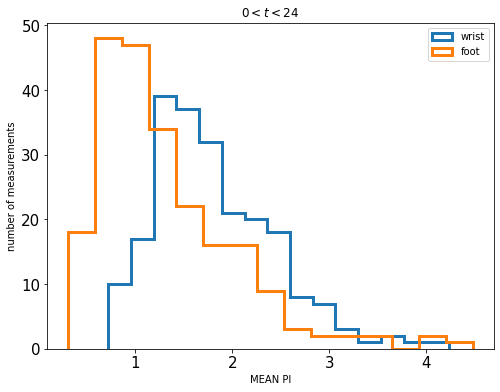

In [41]:
plt.figure(figsize=(8,6))
plt.hist(pi24_w,bins=15,histtype='step',lw=3,label='wrist')
plt.hist(pi24_f,bins=15,histtype='step',lw=3,label='foot')
plt.xlabel('MEAN PI')
plt.ylabel('number of measurements')
plt.title(r'$0<t<24$')
plt.legend()
plt.show()

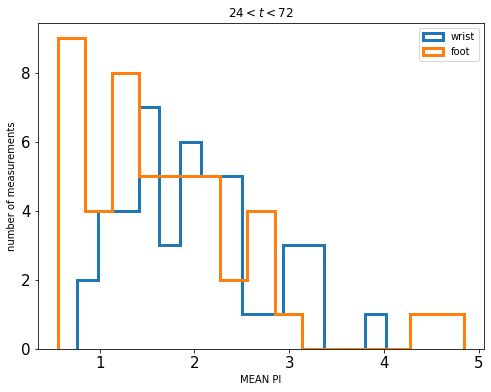

In [42]:
plt.figure(figsize=(8,6))
plt.hist(pi72_w,bins=15,histtype='step',lw=3,label='wrist')
plt.hist(pi72_f,bins=15,histtype='step',lw=3,label='foot')
plt.xlabel('MEAN PI')
plt.ylabel('number of measurements')
plt.title(r'$24<t<72$')
plt.legend()
plt.show()

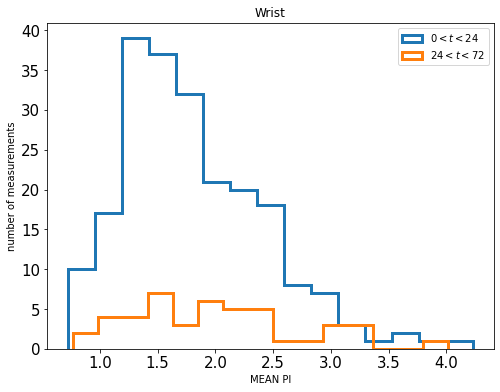

In [43]:
plt.figure(figsize=(8,6))
plt.hist(pi24_w,bins=15,histtype='step',lw=3,label=r'$0<t<24$')
plt.hist(pi72_w,bins=15,histtype='step',lw=3,label=r'$24<t<72$')
plt.xlabel('MEAN PI')
plt.ylabel('number of measurements')
plt.title(r'Wrist')
plt.legend()
plt.show()

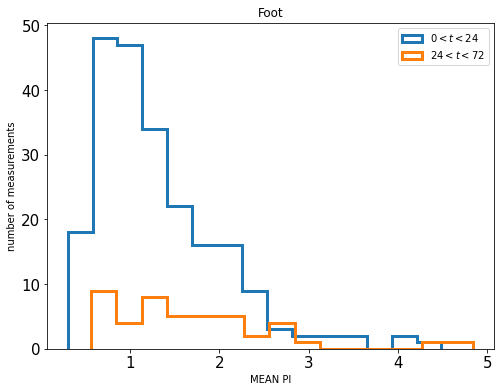

In [44]:
plt.figure(figsize=(8,6))
plt.hist(pi24_f,bins=15,histtype='step',lw=3,label=r'$0<t<24$')
plt.hist(pi72_f,bins=15,histtype='step',lw=3,label=r'$24<t<72$')
plt.xlabel('MEAN PI')
plt.ylabel('number of measurements')
plt.title(r'Foot')
plt.legend()
plt.show()

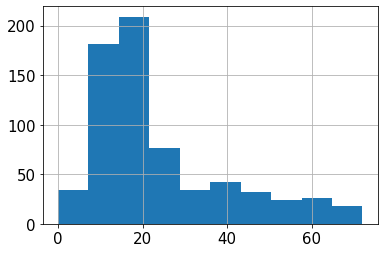

In [45]:
(T['DELTA_SEC_MEASURE']/60./60.).hist(range=(0,72))

In [46]:
len(table_1['BABY_IDS'].unique())

249

In [47]:
len(table_2['BABY_IDS'].unique())

43

In [48]:
len(table_2)

93

In [49]:
len(table_1)

478

# Tests

In [50]:
#sanity check (every baby have a measurement,either from the wrist or the food or both)
all_babies = T[(T['WRIST']==True)|(T['FOOT']==True)]

In [51]:
unique_id(all_babies)

(268, 1.0)

In [52]:
# ALL WRIST (NO PHN)
wrist = T[(T['WRIST']==True)& (T['PHN']==False)]
unique_id(wrist)

(252, 0.9402985074626866)

In [53]:
# ALL FOOT (NO PHN)
foot = T[(T['FOOT']==True)& (T['PHN']==False)]
unique_id(foot)

(263, 0.9813432835820896)

# Using directly a loop on baby objects if the properties are not in the text file

In [54]:
b = baby('FMC003')

### Ethnicity

In [55]:
# id is a builtin function, don't overwrite it!!
help(id)
print('This is the memory address of the variable b: ',id(b))

Help on built-in function id in module builtins:

id(obj, /)
    Return the identity of an object.
    
    This is guaranteed to be unique among simultaneously existing objects.
    (CPython uses the object's memory address.)

This is the memory address of the variable b:  140229404173424


In [56]:
quantity = []
for iid in np.unique(T['BABY_IDS']):
    b = baby(iid)
    #print(iid, ': mean PR = ',b.measurements[0]['PR'].mean())
    #print(iid, ': weight [grams] = ',b.weight_grams)
    quantity.append(b.ethnicity)
quantity = np.array(quantity)

In [57]:
np.unique(quantity)

array(['African-American', 'East Indian', 'Hispanic', 'Native',
       'Oriental', 'Others', 'Unknown', 'White'], dtype='<U16')

In [58]:
print('African-American','\t',len(np.where(quantity=='African-American')[0])  ,round(len(np.where(quantity=='African-American')[0])/268.*100.,2))
print('East Indian'     ,'\t\t',len(np.where(quantity=='East Indian')[0])     ,round(len(np.where(quantity=='East Indian')[0])     /268.*100.,2))
print('Hispanic'        ,'\t\t',len(np.where(quantity=='Hispanic')[0])        ,round(len(np.where(quantity=='Hispanic')[0])        /268.*100.,2))
print('Native'          ,'\t\t\t',len(np.where(quantity=='Native')[0])        ,round(len(np.where(quantity=='Native')[0])          /268.*100.,2))
print('Oriental'        ,'\t\t',len(np.where(quantity=='Oriental')[0])        ,round(len(np.where(quantity=='Oriental')[0])        /268.*100.,2))
print('Others'          ,'\t\t\t',len(np.where(quantity=='Others')[0])        ,round(len(np.where(quantity=='Others')[0])          /268.*100.,2))
print('Unknown'         ,'\t\t',len(np.where(quantity=='Unknown')[0])         ,round(len(np.where(quantity=='Unknown')[0])         /268.*100.,2))
print('White'           ,'\t\t\t',len(np.where(quantity=='White')[0])         ,round(len(np.where(quantity=='White')[0])           /268.*100.,2))

African-American 	 12 4.48
East Indian 		 31 11.57
Hispanic 		 15 5.6
Native 			 3 1.12
Oriental 		 27 10.07
Others 			 17 6.34
Unknown 		 2 0.75
White 			 161 60.07


In [59]:
AGE = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    AGE.append(b.age_mum)
AGE = np.array(AGE)

In [60]:
for i in range(len(ids)):
    print(ids[i],AGE[i])

FMC003 33.0
FMC004 33.0
FMC005 31.0
FMC006 34.0
FMC007 36.0
FMC008 25.0
FMC009 32.0
FMC010 21.0
FMC011 32.0
FMC012 28.0
FMC013 28.0
FMC014 31.0
FMC015 34.0
FMC016 34.0
FMC017 26.0
FMC018 31.0
FMC019 32.0
FMC020 30.0
FMC021 34.0
FMC022 26.0
FMC023 24.0
FMC024 40.0
FMC025 36.0
FMC026 29.0
FMC027 35.0
FMC028 25.0
FMC029 30.0
FMC030 35.0
FMC031 39.0
FMC032 26.0
FMC033 27.0
FMC034 33.0
FMC035 27.0
FMC036 32.0
FMC037 39.0
FMC038 32.0
FMC039 33.0
FMC040 32.0
FMC041 36.0
FMC042 30.0
FMC043 36.0
FMC044 38.0
FMC045 31.0
FMC046 34.0
FMC047 33.0
FMC048 27.0
FMC049 39.0
FMC050 26.0
FMC051 26.0
FMC052 23.0
FMC053 36.0
FMC054 35.0
FMC055 29.0
FMC057 32.0
FMC058 29.0
FMC059 34.0
FMC061 39.0
FMC062 35.0
FMC064 29.0
FMC065 28.0
FMC066 30.0
FMC067 37.0
FMC068 36.0
FMC069 33.0
FMC070 27.0
FMC071 34.0
FMC072 39.0
FMC073 36.0
FMC074 37.0
FMC075 26.0
FMC076 30.0
FMC077 25.0
FMC078 32.0
FMC079 29.0
FMC080 28.0
FMC081 31.0
FMC082 27.0
FMC083 26.0
FMC084 34.0
FMC085 34.0
FMC086 38.0
FMC087 43.0
FMC088 26.0
FMC0

In [61]:
AGE.mean()

31.87313432835821

In [62]:
DIABETES = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    DIABETES.append(b.gestational_diabetes)
DIABETES = np.array(DIABETES)

In [63]:
np.unique(DIABETES)

array(['No', 'Yes'], dtype='<U3')

In [64]:
print('BABIES WITH GESTATIONAL DIABETES: # = %s perc = %s'%(len(np.where(DIABETES=='Yes')[0]),len(np.where(DIABETES=='Yes')[0])/268.*100))

BABIES WITH GESTATIONAL DIABETES: # = 26 perc = 9.701492537313433


In [65]:
SMOKING = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    SMOKING.append(b.smoking)
SMOKING = np.array(SMOKING)

In [66]:
np.unique(SMOKING)

array(['No', 'Yes'], dtype='<U3')

In [67]:
print('SMOKING MUMS: # = %s perc = %s'%(len(np.where(SMOKING=='Yes')[0]),len(np.where(SMOKING=='Yes')[0])/268.*100))

SMOKING MUMS: # = 12 perc = 4.477611940298507


In [68]:
MECONIUM = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    MECONIUM.append(b.meconium)
MECONIUM = np.array(MECONIUM)

KeyboardInterrupt: 

In [ ]:
np.unique(MECONIUM)

In [ ]:
print('Babies with meconium stained liqor: # = %s perc = %s'%(len(np.where(MECONIUM=='Yes')[0]),len(np.where(MECONIUM=='Yes')[0])/268.*100))

In [ ]:
APGAR5 = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    APGAR5.append(b.apgar5)
APGAR5 = np.array(APGAR5)

In [ ]:
np.mean(APGAR5),np.std(APGAR5)

In [ ]:
APGAR5

In [ ]:
ss.iqr(APGAR5,rng=(0,100))

In [ ]:
#MATERNAL PRE-ECLAMPSIA
PRE_ECLAMPSIA = []
ids = np.unique(T['BABY_IDS'])
for iid in ids:
    b = baby(iid)
    PRE_ECLAMPSIA.append(b.preeclampsia)
PRE_ECLAMPSIA = np.array(PRE_ECLAMPSIA)

In [ ]:
np.unique(PRE_ECLAMPSIA)

In [ ]:
print('Babies with maternal pre-eclampsia: # = %s perc = %s'%(len(np.where(PRE_ECLAMPSIA=='Yes')[0]),len(np.where(PRE_ECLAMPSIA=='Yes')[0])/268.*100))

In [ ]:
AGE_FIRST_REC = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    AGE_FIRST_REC.append(np.min(b.measurements_delta_sec_since_birth))
AGE_FIRST_REC = np.array(AGE_FIRST_REC)

In [ ]:
np.min(b.measurements_delta_sec_since_birth)

In [ ]:
np.median(AGE_FIRST_REC)/60./60.

In [ ]:
ss.iqr(AGE_FIRST_REC,rng=(25,75))/60./60.

In [ ]:
age_sort = np.sort(AGE_FIRST_REC)

In [ ]:
print(np.median(AGE_FIRST_REC))

In [ ]:
def my_median(vector):
    vec_sorted = np.sort(vector)
    dispari = np.mod(len(vec_sorted),2)
    index = int(len(vec_sorted)/2.)
    if dispari:
        med = vec_sorted[index]
    else:
        m1 = vec_sorted[index-1]
        m2 = vec_sorted[index]
        med = (m1 + m2)/2.
    return med

In [ ]:
def percentile(vector,perc=25):
    vec_sorted = np.sort(vector)
    frac = perc/100.
    return vec_sorted[int(round(len(vec_sorted)*frac,0))]

In [ ]:
my_median(AGE_FIRST_REC)

In [ ]:
p1 = percentile(AGE_FIRST_REC,perc=25)

In [ ]:
p2 = percentile(AGE_FIRST_REC,perc=75)

In [ ]:
np.absolute(p1-p2)#/60./60.

In [ ]:
ss.iqr(AGE_FIRST_REC)

# Counting the number of measurements per baby

In [76]:
#Number of files per baby
num_recordings = []
num_wrist = []
num_foot = []
ids = np.unique(T['BABY_IDS'])
for iid in ids:
    b = baby(iid)
    num_recordings.append(len(b.files))
    num_wrist.append(len(np.where(b.measurements_wrist==True)[0]))
    num_foot.append(len(np.where(b.measurements_foot==True)[0]))
num_recordings = np.array(num_recordings)

In [90]:
num_wrist = np.array(num_wrist)
num_foot = np.array(num_foot)

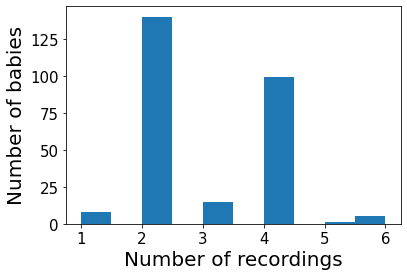

In [84]:
plt.hist(num_recordings)
plt.xlabel('Number of recordings')
plt.ylabel('Number of babies')
plt.show()

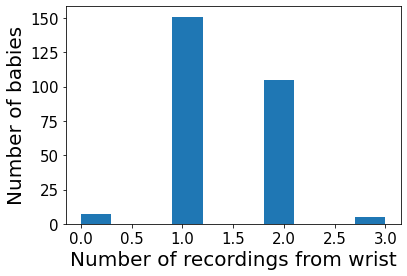

In [85]:
plt.hist(num_wrist)
plt.xlabel('Number of recordings from wrist')
plt.ylabel('Number of babies')
plt.show()

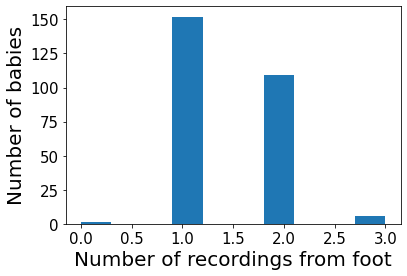

In [86]:
plt.hist(num_foot)
plt.xlabel('Number of recordings from foot')
plt.ylabel('Number of babies')
plt.show()

In [87]:
print('Babies with 0 recordings: %i'%len(np.where(num_recordings==0)[0]))
print('Babies with 1 recording : %i'%len(np.where(num_recordings==1)[0]))
print('Babies with 2 recordings: %i'%len(np.where(num_recordings==2)[0]))
print('Babies with 3 recordings: %i'%len(np.where(num_recordings==3)[0]))
print('Babies with 4 recordings: %i'%len(np.where(num_recordings==4)[0]))
print('Babies with 5 recordings: %i'%len(np.where(num_recordings==5)[0]))
print('Babies with 6 recordings: %i'%len(np.where(num_recordings==6)[0]))
print('Babies with 7 recordings: %i'%len(np.where(num_recordings==7)[0]))

Babies with 0 recordings: 0
Babies with 1 recording : 8
Babies with 2 recordings: 140
Babies with 3 recordings: 15
Babies with 4 recordings: 99
Babies with 5 recordings: 1
Babies with 6 recordings: 5
Babies with 7 recordings: 0


In [94]:
print('Babies with 0 recordings from wrist: %i'%len(np.where(num_wrist==0)[0]))
print('Babies with 1 recording  from wrist: %i'%len(np.where(num_wrist==1)[0]))
print('Babies with 2 recordings from wrist: %i'%len(np.where(num_wrist==2)[0]))
print('Babies with 3 recordings from wrist: %i'%len(np.where(num_wrist==3)[0]))
print('Babies with 4 recordings from wrist: %i'%len(np.where(num_wrist==4)[0]))
#print('Babies with 5 recordings from wrist: %i'%len(np.where(num_wrist==5)[0]))
#print('Babies with 6 recordings from wrist: %i'%len(np.where(num_wrist==6)[0]))
#print('Babies with 7 recordings from wrist: %i'%len(np.where(num_wrist==7)[0]))

Babies with 0 recordings from wrist: 7
Babies with 1 recording  from wrist: 151
Babies with 2 recordings from wrist: 105
Babies with 3 recordings from wrist: 5
Babies with 4 recordings from wrist: 0


In [95]:
print('Babies with 0 recordings from foot: %i'%len(np.where(num_foot==0)[0]))
print('Babies with 1 recording  from foot: %i'%len(np.where(num_foot==1)[0]))
print('Babies with 2 recordings from foot: %i'%len(np.where(num_foot==2)[0]))
print('Babies with 3 recordings from foot: %i'%len(np.where(num_foot==3)[0]))
print('Babies with 4 recordings from foot: %i'%len(np.where(num_foot==4)[0]))
#print('Babies with 5 recordings from foot: %i'%len(np.where(num_foot==5)[0]))
#print('Babies with 6 recordings from foot: %i'%len(np.where(num_foot==6)[0]))
#print('Babies with 7 recordings from foot: %i'%len(np.where(num_foot==7)[0]))

Babies with 0 recordings from foot: 1
Babies with 1 recording  from foot: 152
Babies with 2 recordings from foot: 109
Babies with 3 recordings from foot: 6
Babies with 4 recordings from foot: 0


In [116]:
print('PR 5th percentile %.1f '%          np.percentile(np.array(T['MED_PR'][T['PHN']==False]),5))
print('PR 25th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][T['PHN']==False]),25))
print('PR 50th percentile %.1f (median)'% np.percentile(np.array(T['MED_PR'][T['PHN']==False]),50))
print('PR 75th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][T['PHN']==False]),75))
print('PR 90th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][T['PHN']==False]),90))
print('PR 95th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][T['PHN']==False]),95))

PR 5th percentile 103.5 
PR 25th percentile 114.0 
PR 50th percentile 122.0 (median)
PR 75th percentile 130.0 
PR 90th percentile 138.0 
PR 95th percentile 143.0 


In [122]:
print('PR WRIST 5th percentile %.1f '%          np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),5))
print('PR WRIST 25th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),25))
print('PR WRIST 50th percentile %.1f (median)'% np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),50))
print('PR WRIST 75th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),75))
print('PR WRIST 90th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),90))
print('PR WRIST 95th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),95))

PR WRIST 5th percentile 104.9 
PR WRIST 25th percentile 115.0 
PR WRIST 50th percentile 121.0 (median)
PR WRIST 75th percentile 129.0 
PR WRIST 90th percentile 136.2 
PR WRIST 95th percentile 142.0 


In [124]:
print('PR FOOT 5th percentile %.1f '%          np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),5))
print('PR FOOT 25th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),25))
print('PR FOOT 50th percentile %.1f (median)'% np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),50))
print('PR FOOT 75th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),75))
print('PR FOOT 90th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),90))
print('PR FOOT 95th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),95))

PR FOOT 5th percentile 103.0 
PR FOOT 25th percentile 114.0 
PR FOOT 50th percentile 122.0 (median)
PR FOOT 75th percentile 131.0 
PR FOOT 90th percentile 139.0 
PR FOOT 95th percentile 144.2 
